# Cluster Analysis

Dimensionality reduction  - PCA

In [ ]:
import numpy as np
d = np.array([[170, 70], [150, 45], [160, 55], [180, 60], [170, 80]])
d

array([[170,  70],
       [150,  45],
       [160,  55],
       [180,  60],
       [170,  80]])

In [ ]:
z = d - np.mean(d, axis=0)
z

array([[  4.,   8.],
       [-16., -17.],
       [ -6.,  -7.],
       [ 14.,  -2.],
       [  4.,  18.]])

In [ ]:
sig = np.matmul(z.T, z) / 5
sig

array([[104.,  78.],
       [ 78., 146.]])

In [ ]:
print(np.linalg.svd(sig))

(array([[-0.60828716, -0.79371704],
       [-0.79371704,  0.60828716]]), array([205.77747211,  44.22252789]), array([[-0.60828716, -0.79371704],
       [-0.79371704,  0.60828716]]))


In [ ]:
from sklearn.decomposition import PCA

d_pca = PCA(n_components=2).fit_transform(d)
d_pca

array([[ -8.78288493,  -1.69142909],
       [ 23.22578413,  -2.35859097],
       [  9.2057422 ,  -0.50429214],
       [ -6.9285861 ,  12.32861285],
       [-16.72005531,  -7.77430064]])

## K-Means

In [ ]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

--2021-11-01 10:05:26--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  2.00MB/s    in 1.0s    

2021-11-01 10:05:27 (2.00 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]



In [ ]:
!gzip -d kddcup.data_10_percent.gz

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
 col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
"land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
"num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
"is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
"rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", 
"dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
"dst_host_srv_rerror_rate", "label"]

In [ ]:
with open('./kddcup.data_10_percent', 'r') as file:
  data = pd.read_csv(file, names=col_names)

In [ ]:
# 데이터 불균형 주의...
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [ ]:
unique_labels = data['label'].unique()
unique_labels

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [ ]:
selected_data = pd.DataFrame()
for label in unique_labels:
  selected_data = pd.concat([selected_data, data.loc[data['label'] == label][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,0,1,2,0,0,2,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00,rootkit.
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,0,1,0,1,0,4,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25,rootkit.
397011,0,udp,other,SF,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00,rootkit.
452001,0,udp,other,SF,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00,rootkit.


In [ ]:
selected_data['label'].value_counts()


smurf.              200
satan.              200
back.               200
warezclient.        200
pod.                200
nmap.               200
teardrop.           200
neptune.            200
normal.             200
portsweep.          200
ipsweep.            200
guess_passwd.        53
buffer_overflow.     30
land.                21
warezmaster.         20
imap.                12
rootkit.             10
loadmodule.           9
ftp_write.            8
multihop.             7
phf.                  4
perl.                 3
spy.                  2
Name: label, dtype: int64

In [ ]:
labels = selected_data['label'].to_numpy()
labels


array(['normal.', 'normal.', 'normal.', ..., 'rootkit.', 'rootkit.',
       'rootkit.'], dtype=object)

In [ ]:
data = selected_data.drop('label', axis=1)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,0,1,2,0,0,2,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,0,1,0,1,0,4,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,udp,other,SF,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,udp,other,SF,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
# one-hot encoding이 권장되지만 편의상 factorize 사용
data['protocol_type'], _ = data['protocol_type'].factorize()
data['service'], _ = data['service'].factorize()
data['flag'], _ = data['flag'].factorize()
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,0,0,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,0,0,0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,0,0,0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,0,0,0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,0,2,0,0,5636,0,0,0,0,0,1,2,0,0,2,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,0,1,0,294,3929,0,0,0,0,0,1,0,1,0,4,1,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,2,17,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,2,17,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61041764e-07, 1.05713002e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37254902e-02, 1.37254902e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14960630e-02,
       3.14960630e-02, 1.00000000e+00, 0.00000000e+00, 1.10000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
# 결과를 3차원으로 축소
# 과제에서는 n_components 변환 시도
data = PCA(n_components=3).fit_transform(data)
data[0]

array([-0.78401564, -0.20625633,  0.70468591])

In [ ]:
# 색상 설정
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7126489811610919, 0.10711264898116109, 0.28081507112648985, 1.0),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899, 1.0),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035, 1.0),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776, 1.0),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287, 1.0),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863, 1.0),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996, 1.0),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 (0.8202998846597465, 0.9275663206459055, 

In [ ]:
def gen_color_dict(_unique_labels, _colors):
  color_dict = dict()
  for i in range(len(_unique_labels)):
    color_dict[_unique_labels[i]] = _colors[i]
  return color_dict


gt_color_dict = gen_color_dict(unique_labels, colors)
gt_color_dict

{'back.': (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'ftp_write.': (0.9557862360630527,
  0.9823144944252211,
  0.6800461361014996,
  1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'imap.': (0.8202998846597465, 0.9275663206459055, 0.6126874279123413, 1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'multihop.': (0.3600153787004998,
  0.7161860822760476,
  0.6655132641291811,
  1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'nmap.': (0.47427912341407163, 0.7898500576701268, 0.6459823144944252, 1.0),
 'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176

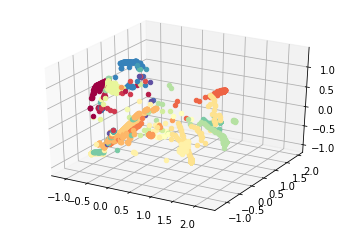

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data)):
  ax.scatter(data[i][0], data[i][1], data[i][2], c=[gt_color_dict[labels[i]]])

plt.show()

In [ ]:
n_clusters = len(set(unique_labels))
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=23, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans_label = kmeans.labels_
kmeans_unique_labels = list(set(kmeans_label))
kmeans_color_dict = gen_color_dict(kmeans_unique_labels, colors)

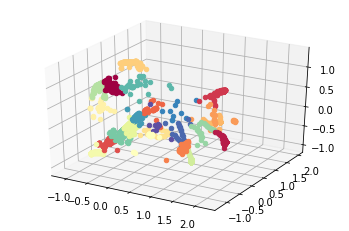

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
  ax.scatter(data[i][0], data[i][1], data[i][2], 
c=[kmeans_color_dict[kmeans_label[i]]])
plt.show()


In [ ]:
label, _ = pd.factorize(labels)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(label, kmeans_label))
print("Completeness: %0.3f" % metrics.completeness_score(label, kmeans_label))
print("V-measure: %0.3f" % metrics.v_measure_score(label, kmeans_label))

Homogeneity: 0.783
Completeness: 0.726
V-measure: 0.753


In [ ]:
kmeans.score(data)

-42.270654164782556

## DBSCAN
minpts 최소 구성 클러스터  
eps 바운더리  
core 원 안에 다른 점들이 minpts이상인 클러스터  
noise 원 안에 minpts만큼 없고 보더 처럼 코어에 걸려있지도 않음  
border 원 안에 minpts만큼 없고 코어에 걸려있음  

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
# DBSCAN은 클러스터 갯수 지정 불가능
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [ ]:
dbscan_label = dbscan.labels_
dbscan_unique_labels = list(set(dbscan_label))
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(dbscan_unique_labels))]
dbscan_color_dict = gen_color_dict(dbscan_unique_labels, colors)


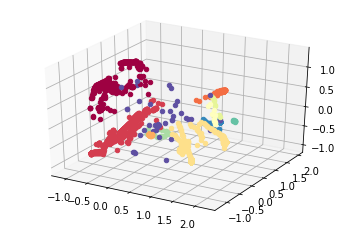

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
  ax.scatter(data[i][0], data[i][1], data[i][2], 
c=[dbscan_color_dict[dbscan_label[i]]])
plt.show()

In [ ]:
#outlier 제외
n_clusters_ = len(set(dbscan_label)) - (1 if -1 in dbscan_label else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, dbscan_label))
print("Completeness: %0.3f" % metrics.completeness_score(labels, dbscan_label))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, dbscan_label))

Estimated number of clusters: 10
Homogeneity: 0.525
Completeness: 0.844
V-measure: 0.647
